# Import Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader
import torchvision.datasets as datasets
import torchvision.transforms as transforms

# Define hyperparameters and transformation

In [2]:
# Define hyperparamerts
batch_size = 64
epochs = 10
learning_rate = 0.01

# Define Transformation
transform = transforms.Compose([
    transforms.ToTensor(),  # convert images to tensor
    transforms.Normalize((0.1307,), (0.3081,))  # normalize pixels values to mean and std.
])

# Load Dataset

In [3]:
train_dataset = datasets.MNIST(root='dataset/', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='dataset/', train=False, transform=transform, download=True)

train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=True)

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 9912422/9912422 [00:00<00:00, 16465602.13it/s]


Extracting dataset/MNIST/raw/train-images-idx3-ubyte.gz to dataset/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 28881/28881 [00:00<00:00, 502358.41it/s]


Extracting dataset/MNIST/raw/train-labels-idx1-ubyte.gz to dataset/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 1648877/1648877 [00:00<00:00, 4516299.94it/s]


Extracting dataset/MNIST/raw/t10k-images-idx3-ubyte.gz to dataset/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 4542/4542 [00:00<00:00, 2995366.16it/s]

Extracting dataset/MNIST/raw/t10k-labels-idx1-ubyte.gz to dataset/MNIST/raw



# Define NN

In [4]:
# Define the neural network model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        # NN has two fully connected layers
        self.fc1 = nn.Linear(784, 500)  # first layer take flattened images as input and outputs 512 features.
        self.fc2 = nn.Linear(500, 10)   # second layer take 512 features as inputs and output 10 classes.

    def forward(self, x):
        x = x.view(-1, 784)  # flatten the image into vector
        x = F.relu(self.fc1(x)) # Apply relu activation function for first layer
        x = self.fc2(x)  # Apply second layer
        return x

# Define the loss function and the optimizer

In [12]:
# Create an instance of the model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu") # Get the device
model = NeuralNetwork().to(device)
print(model)

# Define the loss function and the optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

# Define a function to calculate the accuracy of the model
def accuracy(outputs, labels):
    # The accuracy is the percentage of correct predictions
    _, preds = torch.max(outputs, 1) # Get the predicted classes from the output logits
    return torch.sum(preds == labels).item() / len(labels)



NeuralNetwork(
  (fc1): Linear(in_features=784, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=10, bias=True)
)


# Define the Training loop

In [15]:
# Define train loop
def train_loop(model, device, criterion, optimizer, train_loader, epochs):
  model.train()
  running_loss = 0
  running_acc = 0

  # loop over batches of data
  for i, (inputs, labels) in enumerate(train_loader):
    inputs = inputs.to(device)
    labels = labels.to(device)
    # zero the parameter gradients
    optimizer.zero_grad()

    # Forward pass
    outputs = model(inputs)
    loss = criterion(outputs, labels)

    # Backward pass and optimization
    loss.backward()
    optimizer.step() # update paramters
    running_loss += loss.item() # Accumulate the loss
    running_acc += accuracy(outputs, labels) # Accumulate the accuracy
    if (i + 1) % 200 == 0: # Print every 200 batches
          print(f'Epoch {epoch}, Batch {i + 1}, Loss: {running_loss / 200:.4f}, Accuracy: {running_acc / 200:.4f}')
          running_loss = 0.0
          running_acc = 0.0


# Define Testing loop

In [16]:
def test_loop(model, device, criterion, test_loader):
  model.eval()
  test_loss = 0
  test_acc = 0
  with torch.no_grad():
    for inputs, labels in test_loader:
      inputs = inputs.to(device)
      labels = labels.to(device)

      # Forward Pass
      outputs = model(inputs)
      loss = criterion(outputs, labels)
      test_loss += loss.item()
      test_acc += accuracy(outputs, labels)
      # Print the average loss and accuracy
    print(f'Test Loss: {test_loss / len(test_loader):.4f}, Test Accuracy: {test_acc / len(test_loader):.4f}')

# Train and Test model

Epoch 0, Batch 200, Loss: 1.1233, Accuracy: 0.7498
Epoch 0, Batch 400, Loss: 0.4926, Accuracy: 0.8761
Epoch 0, Batch 600, Loss: 0.3955, Accuracy: 0.8910
Epoch 0, Batch 800, Loss: 0.3599, Accuracy: 0.9005
Test Loss: 0.3121, Test Accuracy: 0.9123
Epoch 1, Batch 200, Loss: 0.3188, Accuracy: 0.9086
Epoch 1, Batch 400, Loss: 0.2996, Accuracy: 0.9120
Epoch 1, Batch 600, Loss: 0.2755, Accuracy: 0.9216
Epoch 1, Batch 800, Loss: 0.2811, Accuracy: 0.9209
Test Loss: 0.2539, Test Accuracy: 0.9260
Epoch 2, Batch 200, Loss: 0.2501, Accuracy: 0.9312
Epoch 2, Batch 400, Loss: 0.2467, Accuracy: 0.9302
Epoch 2, Batch 600, Loss: 0.2413, Accuracy: 0.9308
Epoch 2, Batch 800, Loss: 0.2333, Accuracy: 0.9338
Test Loss: 0.2184, Test Accuracy: 0.9372
Epoch 3, Batch 200, Loss: 0.2141, Accuracy: 0.9401
Epoch 3, Batch 400, Loss: 0.2112, Accuracy: 0.9411
Epoch 3, Batch 600, Loss: 0.2114, Accuracy: 0.9398
Epoch 3, Batch 800, Loss: 0.2011, Accuracy: 0.9432
Test Loss: 0.1925, Test Accuracy: 0.9442
Epoch 4, Batch 200, 

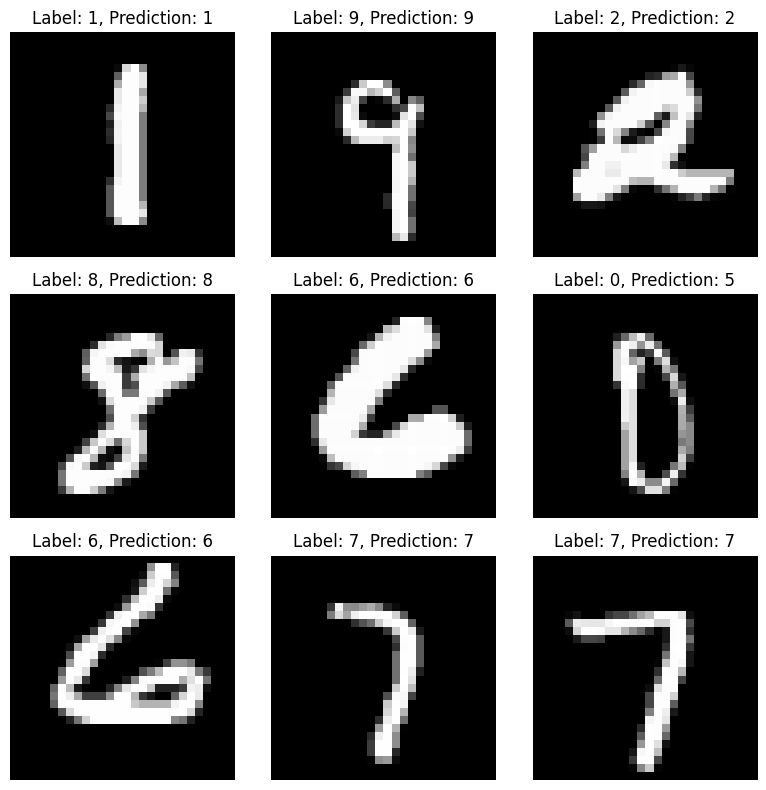

In [17]:
for epoch in range(epochs):
  train_loop(model, device, criterion, optimizer, train_loader, epoch)
  test_loop(model, device, criterion, test_loader)

# Visualize some sample images and predictions
samples, labels = next(iter(test_loader)) # Get a batch of test data
samples = samples.to(device) # Move the samples to the device
outputs = model(samples) # Get the output logits from the model
_, preds = torch.max(outputs, 1) # Get the predicted classes from the output logits
samples = samples.cpu().numpy() # Move the samples back to CPU and convert to numpy array
fig, axes = plt.subplots(3, 3, figsize=(8, 8)) # Create a 3x3 grid of subplots
for i, ax in enumerate(axes.ravel()):
    ax.imshow(samples[i].squeeze(), cmap='gray') # Plot the image
    ax.set_title(f'Label: {labels[i]}, Prediction: {preds[i]}') # Set the title
    ax.axis('off') # Hide the axes
plt.tight_layout() # Adjust the spacing
plt.show() # Show the plot